<hr/>

# Data Mining


<hr/>

<h2><font color="darkblue">Assignment 2</font></h2>

For these problems, you can use any python modules including `sklearn`.

#### Deadline
Homework is due in a week, and should be submitted on Blackboard. Don't wait till the last minute!

####  Work alone!
Please work on your own solving these assignments! 

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib



### Problem 1

The included csv contains 200 observations in two dimensions each belonging to one of two distinct classes. THe first two columns contain the features, and the third and final column contains the class labels.

1. Plot the features colored by the true class memberships. Do you think LDA or 1-Nearest-Neighbor will perform better classification? Explain your reasoning! (2 pts)
2. Compare the performance of LDA and 1-NN using 4-fold cross-validation (3 pts).
3. Repeat part 2 using 8-fold and 10-fold cross-validation (2 pts).
4. Based on your results in parts 2 and 3, which of the two methods seems more effective for the given data? (1 pt).

Total of 8 points

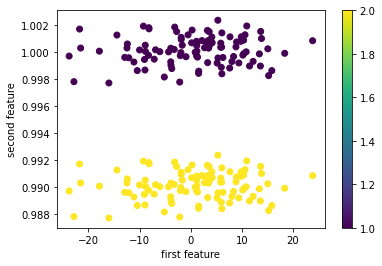

In [23]:
import pandas as pd
p1 = pd.read_csv('problem1.csv')

plt.scatter(p1['0'],p1['1'],c=p1['2']);
colorbar();
xlabel('first feature');
ylabel('second feature');

It seems the two classes are clearly separated, but it is based on the fact that the x and y axis have different scaling, i.e. first feature is between -20 to 20 while second feature is between 0.988 to 1.002. 1-Nearest Neighbor consider only the difference, so considering the plot with same scale of x and y axis, it may not be a good idea since clearly we intend to separate the two classes with only the second feature. That is why LDA is better.

In [47]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import neighbors

X = p1
C = p1['2']

clf1 = LDA()
score1 = cross_val_score(clf1, X,C, cv=4)
print("For Linear Discriminant Analysis with 4-fold, accuracy: %0.4f (+/- %0.4f)" % ( mean(score1), std(score1) * 1.96))

clf2 = neighbors.KNeighborsClassifier(1)
score2 = cross_val_score(clf2, X, C, cv=4)    
print("For 1-NN classifier, accuracy with 4-fold: %0.4f (+/- %0.4f)" % ( mean(score2), std(score2) * 1.96))

For Linear Discriminant Analysis with 4-fold, accuracy: 1.0000 (+/- 0.0000)
For 1-NN classifier, accuracy with 4-fold: 1.0000 (+/- 0.0000)


In [48]:
clf1 = LDA()
score1 = cross_val_score(clf1, X,C, cv=8)
print("For Linear Discriminant Analysis with 8-fold, accuracy: %0.4f (+/- %0.4f)" % ( mean(score1), std(score1) * 1.96))

clf2 = neighbors.KNeighborsClassifier(1)
score2 = cross_val_score(clf2, X, C, cv=8)    
print("For 1-NN classifier, accuracy with 8-fold: %0.4f (+/- %0.4f)" % ( mean(score2), std(score2) * 1.96))

For Linear Discriminant Analysis with 8-fold, accuracy: 1.0000 (+/- 0.0000)
For 1-NN classifier, accuracy with 8-fold: 0.9900 (+/- 0.0339)


In [49]:
clf1 = LDA()
score1 = cross_val_score(clf1, X,C, cv=10)
print("For Linear Discriminant Analysis with 10-fold, accuracy: %0.4f (+/- %0.4f)" % ( mean(score1), std(score1) * 1.96))

clf2 = neighbors.KNeighborsClassifier(1)
score2 = cross_val_score(clf2, X, C, cv=10)    
print("For 1-NN classifier, accuracy with 10-fold: %0.4f (+/- %0.4f)" % ( mean(score2), std(score2) * 1.96))

For Linear Discriminant Analysis with 10-fold, accuracy: 1.0000 (+/- 0.0000)
For 1-NN classifier, accuracy with 10-fold: 1.0000 (+/- 0.0000)


Based on part 2 and 3, LDA seems more effective since 1-NN classifier has accuracy with 8-fold: 0.9900 (+/- 0.0339) while the accuracy of LDA with all folds is 1.

### Problem 2

Let $X$ be a univariate random variable with density function
\begin{equation}
f(x) = \begin{cases}\frac{1}{Z}\frac{a^{x-1}\beta^{xc}}{\Gamma(x)^b}, &\text{if } x > 0\\
0, &\text{if } x\leq 0
\end{cases}
\end{equation}
where $Z$ is a normalizing constant which does not possess a closed analytical form, and $\Gamma(\cdot)$ is the Gamma function.

1. Fix $a=b=c=2$. For each value of $\beta \in \{.5, 1, 2\}$ use Metropolis-Hastings to generate a sample of 10,000 observations from this distribution, with a burn-in of 1,000 iterations and proposal distribution $Q(x_{\text{new}}| x_{\text{old}}) = \text{Uniform}(x_{\text{old}}-.5, x_{\text{old}}+.5)$. Do not use a built-in Metropolis-Hastings function -- program your own! (5 pts)
2. Use KDE with a Gaussian kernel to approximate the densities for each sample. Plot all three estimated densities on the same set of axes. (2 pts)

Total of 7 points

Use the following implementation of the Gamma function:

Text(0.5, 1.0, 'beta = .5')

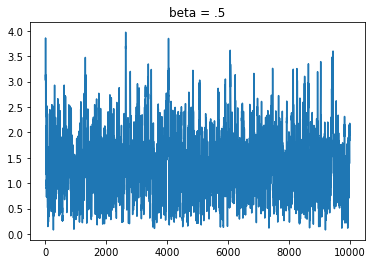

In [149]:
from scipy.special import gamma
x1 = np.zeros(10000)
old = 1.8
i = 0
while i<11000:
    new = random.uniform(old-0.5,old+0.5)
    while new < 0:
        new = random.uniform(old-0.5,old+0.5)
    p = (2**(new-old))*(0.5**(2*(new-old)))
    p = p * (gamma(old)**(2))
    p = p/gamma(new)**(2)
    if p > random.uniform(0,1):
        if i >= 1000:
            x1[i-1000] = new
        old = new
        i = i + 1

plt.plot(x1);
plt.title('beta = .5')

Text(0.5, 1.0, 'beta = 1')

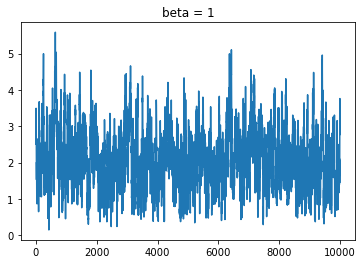

In [150]:
x2 = np.zeros(10000)
old = 3
i = 0
while i<11000:
    new = random.uniform(old-0.5,old+0.5)
    while new < 0:
        new = random.uniform(old-0.5,old+0.5)
    p = (2**(new-old))*(1**(2*(new-old)))
    p = p * (gamma(old)**(2))
    p = p/gamma(new)**(2)
    if p > random.uniform(0,1):
        if i >= 1000:
            x2[i-1000] = new
        old = new
        i = i + 1

plt.plot(x2);
plt.title('beta = 1')

Text(0.5, 1.0, 'beta = 2')

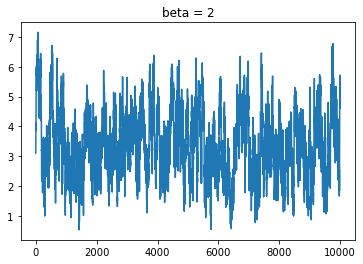

In [151]:
x3 = np.zeros(10000)
old = 4
i = 0
while i<11000:
    new = random.uniform(old-0.5,old+0.5)
    while new < 0:
        new = random.uniform(old-0.5,old+0.5)
    p = (2**(new-old))*(2**(2*(new-old)))
    p = p * (gamma(old)**(2))
    p = p/gamma(new)**(2)
    if p > random.uniform(0,1):
        if i >= 1000:
            x3[i-1000] = new
        old = new
        i = i + 1

plt.plot(x3);
plt.title('beta = 2')

Text(0.5, 1.0, 'beta = .5')

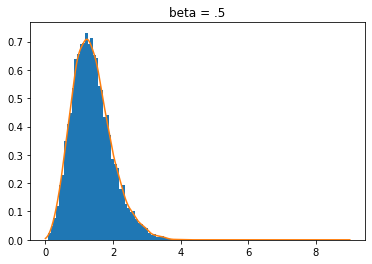

In [152]:
from scipy.stats.kde import gaussian_kde
x = np.linspace(0,9,5000)
density1 = gaussian_kde(x1)
plt.hist(x1,bins=50,density=True);
plt.plot(x, density1(x))
plt.title('beta = .5')

Text(0.5, 1.0, 'beta = 1')

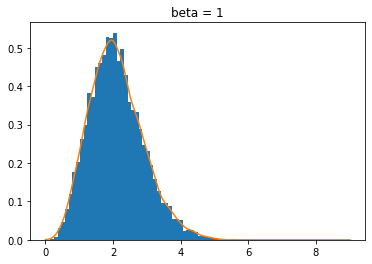

In [153]:
x = np.linspace(0,9,5000)
density2 = gaussian_kde(x2)
plt.hist(x2,bins=50,density=True);
plt.plot(x, density2(x))
plt.title('beta = 1')

Text(0.5, 1.0, 'beta = 2')

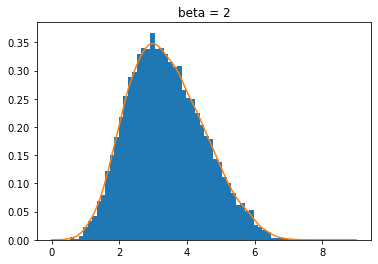

In [154]:
x = np.linspace(0,9,5000)
density3 = gaussian_kde(x3)
plt.hist(x3,bins=50,density=True);
plt.plot(x, density3(x))
plt.title('beta = 2')

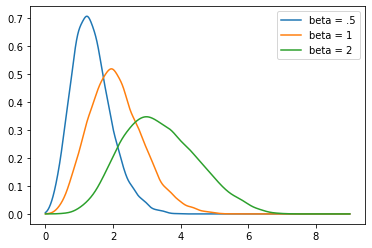

In [155]:
plt.plot(x, density1(x), label ="beta = .5")
plt.plot(x, density2(x), label ="beta = 1")
plt.plot(x, density3(x), label ="beta = 2")
plt.legend()